<a href="https://colab.research.google.com/github/kdemertzis/LNexamples/blob/main/Fed_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from collections import defaultdict

# Generate synthetic data
def generate_synthetic_data(num_clients, samples_per_client, seed=None):
    if seed is not None:
        np.random.seed(seed)
        
    clients_data = {}
    for client_id in range(num_clients):
        X = np.random.rand(samples_per_client, 1)
        y = 3 * X + 4 + np.random.normal(0, 0.5, (samples_per_client, 1))
        clients_data[client_id] = (X, y)
        
    return clients_data

# Train local models
def train_local_models(clients_data):
    local_models = {}
    for client_id, (X, y) in clients_data.items():
        model = LinearRegression()
        model.fit(X, y)
        local_models[client_id] = model
        
    return local_models

# Aggregate local models
def aggregate_local_models(local_models):
    aggregated_model = LinearRegression()
    coefficients = np.zeros((2,))
    num_clients = len(local_models)
    
    for model in local_models.values():
        coefficients += np.array([model.intercept_[0], model.coef_[0][0]])
        
    coefficients /= num_clients
    aggregated_model.intercept_ = np.array([coefficients[0]])
    aggregated_model.coef_ = np.array([[coefficients[1]]])
    
    return aggregated_model

# Main
num_clients = 5
samples_per_client = 100

clients_data = generate_synthetic_data(num_clients, samples_per_client, seed=42)
local_models = train_local_models(clients_data)
aggregated_model = aggregate_local_models(local_models)

# Evaluation
mse_per_client = defaultdict(float)
for client_id, (X, y) in clients_data.items():
    local_pred = local_models[client_id].predict(X)
    local_mse = mean_squared_error(y, local_pred)
    mse_per_client[f"Client {client_id} Local"] = local_mse
    
    aggregated_pred = aggregated_model.predict(X)
    aggregated_mse = mean_squared_error(y, aggregated_pred)
    mse_per_client[f"Client {client_id} Aggregated"] = aggregated_mse

for key, value in mse_per_client.items():
    print(f"{key} MSE: {value:.4f}")


Client 0 Local MSE: 0.2016
Client 0 Aggregated MSE: 0.2079
Client 1 Local MSE: 0.1987
Client 1 Aggregated MSE: 0.1996
Client 2 Local MSE: 0.2599
Client 2 Aggregated MSE: 0.2653
Client 3 Local MSE: 0.2796
Client 3 Aggregated MSE: 0.2876
Client 4 Local MSE: 0.2147
Client 4 Aggregated MSE: 0.2253


In [2]:
!pip install matplotlib seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


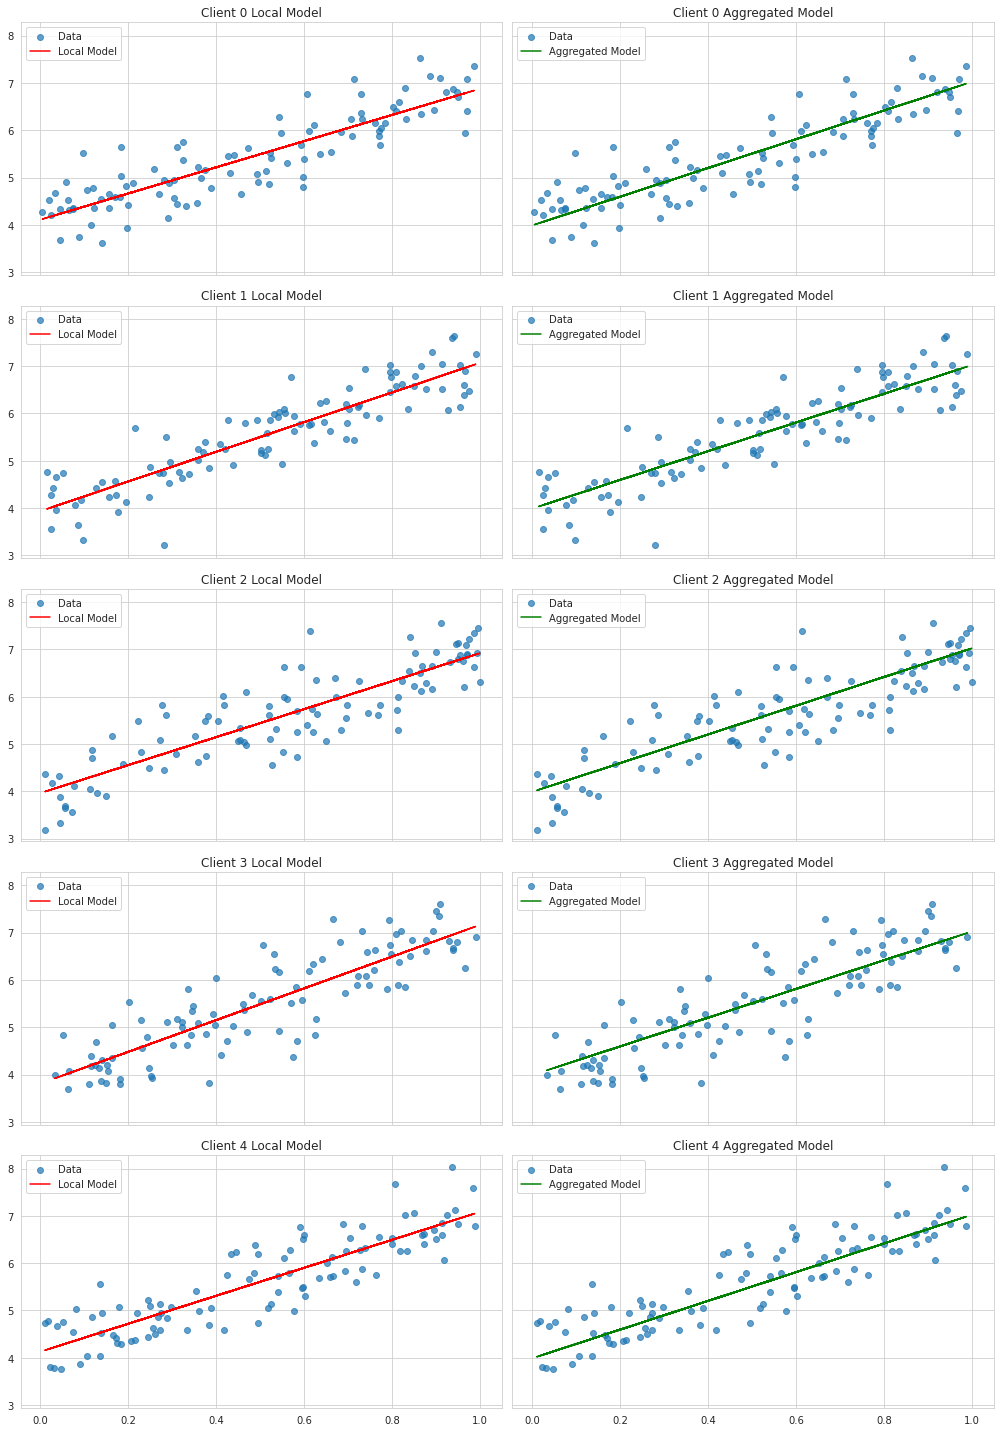

Client 0 Local MSE: 0.2016
Client 0 Aggregated MSE: 0.2079
Client 1 Local MSE: 0.1987
Client 1 Aggregated MSE: 0.1996
Client 2 Local MSE: 0.2599
Client 2 Aggregated MSE: 0.2653
Client 3 Local MSE: 0.2796
Client 3 Aggregated MSE: 0.2876
Client 4 Local MSE: 0.2147
Client 4 Aggregated MSE: 0.2253


In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


# Generate synthetic data
def generate_synthetic_data(num_clients, samples_per_client, seed=None):
    if seed is not None:
        np.random.seed(seed)
        
    clients_data = {}
    for client_id in range(num_clients):
        X = np.random.rand(samples_per_client, 1)
        y = 3 * X + 4 + np.random.normal(0, 0.5, (samples_per_client, 1))
        clients_data[client_id] = (X, y)
        
    return clients_data

# Train local models
def train_local_models(clients_data):
    local_models = {}
    for client_id, (X, y) in clients_data.items():
        model = LinearRegression()
        model.fit(X, y)
        local_models[client_id] = model
        
    return local_models

# Aggregate local models
def aggregate_local_models(local_models):
    aggregated_model = LinearRegression()
    coefficients = np.zeros((2,))
    num_clients = len(local_models)
    
    for model in local_models.values():
        coefficients += np.array([model.intercept_[0], model.coef_[0][0]])
        
    coefficients /= num_clients
    aggregated_model.intercept_ = np.array([coefficients[0]])
    aggregated_model.coef_ = np.array([[coefficients[1]]])
    
    return aggregated_model


def visualize_data_and_models(clients_data, local_models, aggregated_model):
    fig, axes = plt.subplots(nrows=num_clients, ncols=2, figsize=(14, num_clients * 4), sharex=True, sharey=True)
    
    for client_id, (X, y) in clients_data.items():
        local_pred = local_models[client_id].predict(X)
        aggregated_pred = aggregated_model.predict(X)
        
        axes[client_id, 0].scatter(X, y, label='Data', alpha=0.7)
        axes[client_id, 0].plot(X, local_pred, color='red', label='Local Model')
        axes[client_id, 0].set_title(f'Client {client_id} Local Model')
        axes[client_id, 0].legend()
        
        axes[client_id, 1].scatter(X, y, label='Data', alpha=0.7)
        axes[client_id, 1].plot(X, aggregated_pred, color='green', label='Aggregated Model')
        axes[client_id, 1].set_title(f'Client {client_id} Aggregated Model')
        axes[client_id, 1].legend()

    plt.tight_layout()
    plt.show()


# Main
num_clients = 5
samples_per_client = 100

clients_data = generate_synthetic_data(num_clients, samples_per_client, seed=42)
local_models = train_local_models(clients_data)
aggregated_model = aggregate_local_models(local_models)

visualize_data_and_models(clients_data, local_models, aggregated_model)

# Evaluation
mse_per_client = defaultdict(float)
for client_id, (X, y) in clients_data.items():
    local_pred = local_models[client_id].predict(X)
    local_mse = mean_squared_error(y, local_pred)
    mse_per_client[f"Client {client_id} Local"] = local_mse
    
    aggregated_pred = aggregated_model.predict(X)
    aggregated_mse = mean_squared_error(y, aggregated_pred)
    mse_per_client[f"Client {client_id} Aggregated"] = aggregated_mse

for key, value in mse_per_client.items():
    print(f"{key} MSE: {value:.4f}")
